## Nine (9) different types of fruits categorization and recognition model

The dataset used in this project is from https://www.kaggle.com/datasets/shreyapmaher/fruits-dataset-images

In [ ]:
# unzip the dataset
import zipfile

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Fruits/Fruits Dataset.zip')
zip_ref.extractall()
zip_ref.close()

In [ ]:
# How many images in each folder
import os
# walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk('Fruits Dataset'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in Fruits Dataset
There are 9 directories and 0 images in Fruits Dataset/Train
There are 0 directories and 32 images in Fruits Dataset/Train/grapes fruit
There are 0 directories and 32 images in Fruits Dataset/Train/mango fruit
There are 0 directories and 32 images in Fruits Dataset/Train/strawberry fruit
There are 0 directories and 32 images in Fruits Dataset/Train/chickoo fruit
There are 0 directories and 39 images in Fruits Dataset/Train/apple fruit
There are 0 directories and 32 images in Fruits Dataset/Train/banana fruit
There are 0 directories and 32 images in Fruits Dataset/Train/orange fruit
There are 0 directories and 32 images in Fruits Dataset/Train/kiwi fruit
There are 0 directories and 32 images in Fruits Dataset/Train/cherry fruit
There are 9 directories and 0 images in Fruits Dataset/Test
There are 0 directories and 8 images in Fruits Dataset/Test/grapes fruit
There are 0 directories and 8 images in Fruits Dataset/Test/mango fruit
The

In [ ]:
train_dir ='/content/Fruits Dataset/Train/'
test_dir ='/content/Fruits Dataset/Test/'

In [ ]:
# Let's get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['apple fruit' 'banana fruit' 'cherry fruit' 'chickoo fruit'
 'grapes fruit' 'kiwi fruit' 'mango fruit' 'orange fruit'
 'strawberry fruit']


In [ ]:
# Let's visualize the data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  #Show the shape of the image
  print(f'image shape: {img.shape}')

  return img

image shape: (1610, 2146, 3)


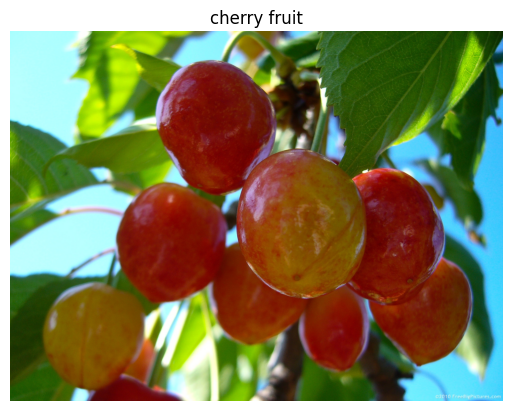

In [ ]:
img=view_random_image(train_dir, random.choice(class_names))

## Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               class_mode='categorical',
                                               target_size=(224,224))

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             class_mode='categorical',
                                             target_size=(224,224))


Found 294 images belonging to 9 classes.
Found 72 images belonging to 9 classes.


In [ ]:
# Build the first model
import tensorflow as tf
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten
from tensorflow.keras import Sequential

In [ ]:
model_1 = Sequential([Conv2D(10,3, activation='relu', input_shape=(224,224,3)),
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10,3, activation='relu'),
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(9, activation='softmax')])

#Compile the model
model_1.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics ='accuracy')

# Fit the model
history_1 = model_1.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
10/10 [==============================] - 13s 1s/step - loss: 2.6004 - accuracy: 0.1224 - val_loss: 2.2122 - val_accuracy: 0.1111
Epoch 2/10
10/10 [==============================] - 11s 1s/step - loss: 2.1769 - accuracy: 0.1293 - val_loss: 2.1561 - val_accuracy: 0.1944
Epoch 3/10
10/10 [==============================] - 10s 1s/step - loss: 2.0943 - accuracy: 0.2007 - val_loss: 2.0927 - val_accuracy: 0.1944
Epoch 4/10
10/10 [==============================] - 11s 1s/step - loss: 1.9567 - accuracy: 0.2347 - val_loss: 1.9877 - val_accuracy: 0.1944
Epoch 5/10
10/10 [==============================] - 11s 1s/step - loss: 1.8077 - accuracy: 0.2891 - val_loss: 1.9073 - val_accuracy: 0.2778
Epoch 6/10
10/10 [==============================] - 13s 1s/step - loss: 1.7035 - accuracy: 0.4116 - val_loss: 1.8738 - val_accuracy: 0.2639
Epoch 7/10
10/10 [==============================] - 12s 1s/step - loss: 1.5969 - accuracy: 0.4354 - val_loss: 1.9099 - val_accuracy: 0.3333
Epoch 8/10
10/10 [==

In [ ]:
# Create a function to view the curves

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(loss))

  #plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

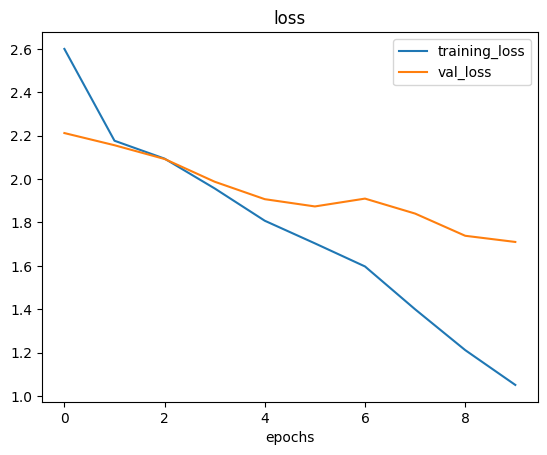

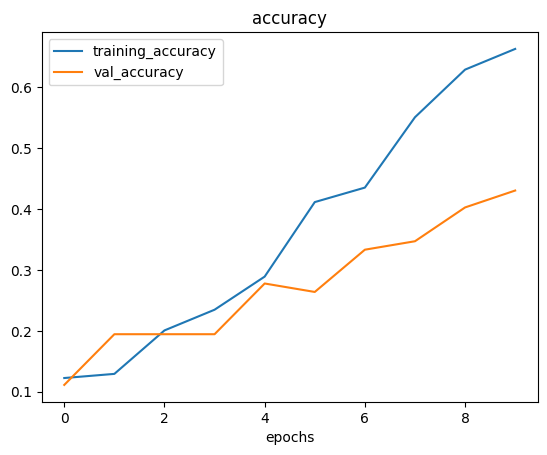

In [ ]:
plot_loss_curves(history_1)

In [ ]:
# Apply data augmentation to our model
# create an augmented data generator instance

train_datagen_augmented = ImageDataGenerator(rescale=1./255.,
                                             rotation_range = 0.2,
                                             width_shift_range=0.2,
                                             height_shift_range =0.2,
                                             zoom_range=0.2,
                                             shear_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 294 images belonging to 9 classes.


In [ ]:
# Create model 2
model_2 = Sequential([Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10,3, activation='relu'),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(9, activation='softmax')])

# Compile the model
model_2.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data_augmented, epochs=20,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
10/10 [==============================] - 17s 1s/step - loss: 2.1930 - accuracy: 0.1088 - val_loss: 2.1741 - val_accuracy: 0.1389
Epoch 2/20
10/10 [==============================] - 14s 1s/step - loss: 2.1322 - accuracy: 0.1122 - val_loss: 2.1110 - val_accuracy: 0.1111
Epoch 3/20
10/10 [==============================] - 14s 1s/step - loss: 2.0599 - accuracy: 0.1701 - val_loss: 2.0391 - val_accuracy: 0.2083
Epoch 4/20
10/10 [==============================] - 14s 1s/step - loss: 1.9612 - accuracy: 0.2211 - val_loss: 1.9682 - val_accuracy: 0.3194
Epoch 5/20
10/10 [==============================] - 14s 1s/step - loss: 1.8396 - accuracy: 0.2925 - val_loss: 1.8398 - val_accuracy: 0.2361
Epoch 6/20
10/10 [==============================] - 14s 1s/step - loss: 1.7660 - accuracy: 0.3163 - val_loss: 1.8708 - val_accuracy: 0.2639
Epoch 7/20
10/10 [==============================] - 14s 1s/step - loss: 1.6754 - accuracy: 0.3333 - val_loss: 1.7020 - val_accuracy: 0.4028
Epoch 8/20
10/10 [==

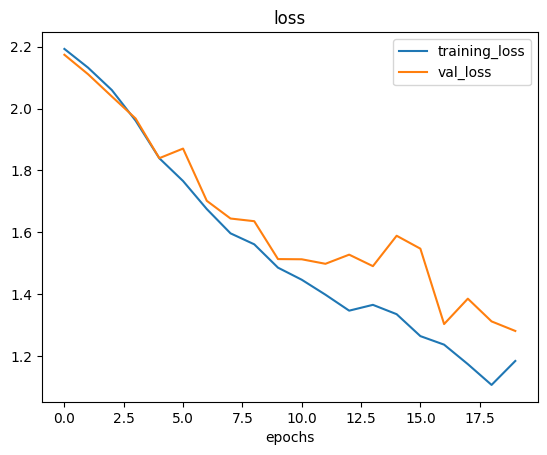

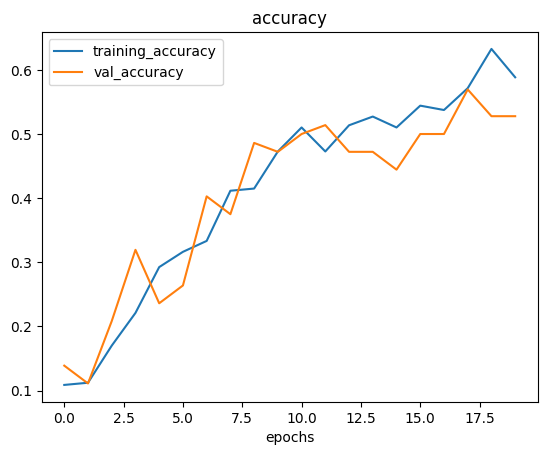

In [ ]:
#Plot model_2 loss curves
plot_loss_curves(history_2)

In [ ]:
# Our model is not performing well, let's simply our model

model_3 = Sequential([Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(9, activation='softmax')])

#Compile our model
model_3.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

#Fit the model
history_3 = model_3.fit(train_data_augmented,
            epochs=50,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/50
10/10 [==============================] - 15s 1s/step - loss: 2.6256 - accuracy: 0.1259 - val_loss: 2.2147 - val_accuracy: 0.2500
Epoch 2/50
10/10 [==============================] - 13s 1s/step - loss: 2.0006 - accuracy: 0.2585 - val_loss: 1.8808 - val_accuracy: 0.2778
Epoch 3/50
10/10 [==============================] - 14s 1s/step - loss: 1.7811 - accuracy: 0.3435 - val_loss: 1.6806 - val_accuracy: 0.4722
Epoch 4/50
10/10 [==============================] - 13s 1s/step - loss: 1.6042 - accuracy: 0.4252 - val_loss: 1.6121 - val_accuracy: 0.4167
Epoch 5/50
10/10 [==============================] - 14s 1s/step - loss: 1.5865 - accuracy: 0.4320 - val_loss: 1.6951 - val_accuracy: 0.3333
Epoch 6/50
10/10 [==============================] - 13s 1s/step - loss: 1.5081 - accuracy: 0.4524 - val_loss: 1.5480 - val_accuracy: 0.4028
Epoch 7/50
10/10 [==============================] - 13s 1s/step - loss: 1.4628 - accuracy: 0.4558 - val_loss: 1.4871 - val_accuracy: 0.4028
Epoch 8/50
10/10 [==

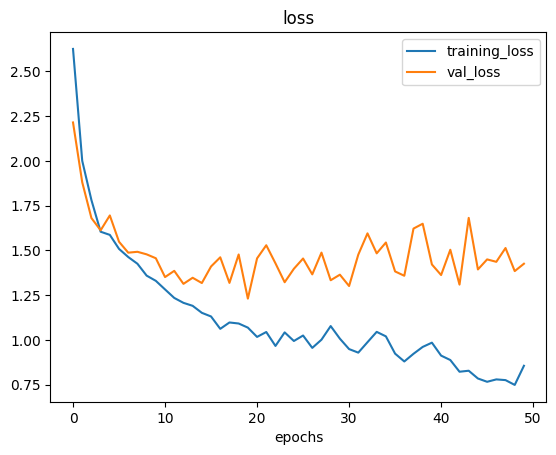

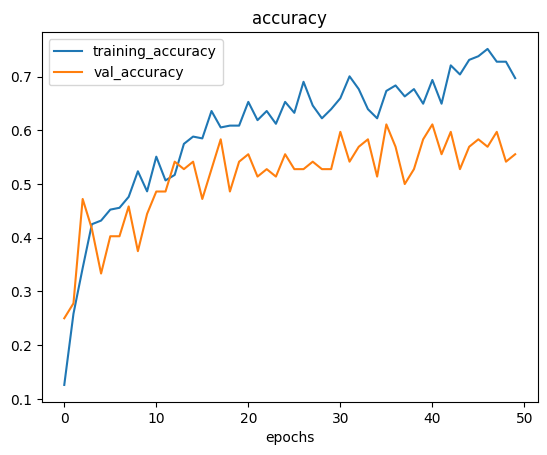

In [ ]:
plot_loss_curves(history_3)

## Our model is not performing well. Let's try transfer learning using the Sequential API

In [ ]:
# Training our model using resnet and efficientnet
resnet_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnet_url ='https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

In [ ]:
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
# Let's create a function to train our model
def create_model(model_url,classes=9):
  model=hub.KerasLayer(model_url,
                       trainable=False,
                       input_shape=(224,224,3))

  #create our own model
  model=Sequential([model,
                    Dense(classes,activation='softmax')])
  return model

In [ ]:
# Train our model using the resnet_url
resnet_model = create_model(resnet_url,classes=9)

# # Compile the model
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer='Adam',
                     metrics=['accuracy'])

#fit the model
history_4 = resnet_model.fit(train_data,
                             epochs=10,
                             steps_per_epoch=len(train_data),
                             validation_data=test_data,
                             validation_steps=len(test_data))

Epoch 1/10
10/10 [==============================] - 18s 1s/step - loss: 2.4044 - accuracy: 0.2381 - val_loss: 1.6291 - val_accuracy: 0.4722
Epoch 2/10
10/10 [==============================] - 11s 1s/step - loss: 1.0876 - accuracy: 0.6803 - val_loss: 0.9290 - val_accuracy: 0.7083
Epoch 3/10
10/10 [==============================] - 11s 1s/step - loss: 0.5626 - accuracy: 0.8537 - val_loss: 0.6645 - val_accuracy: 0.7778
Epoch 4/10
10/10 [==============================] - 11s 1s/step - loss: 0.3616 - accuracy: 0.9252 - val_loss: 0.5452 - val_accuracy: 0.7917
Epoch 5/10
10/10 [==============================] - 10s 1s/step - loss: 0.2524 - accuracy: 0.9558 - val_loss: 0.5004 - val_accuracy: 0.7917
Epoch 6/10
10/10 [==============================] - 11s 1s/step - loss: 0.1964 - accuracy: 0.9694 - val_loss: 0.4751 - val_accuracy: 0.8194
Epoch 7/10
10/10 [==============================] - 11s 1s/step - loss: 0.1588 - accuracy: 0.9830 - val_loss: 0.4432 - val_accuracy: 0.8056
Epoch 8/10
10/10 [==

In [ ]:
# Train our model using the efficientnet_url
efficientnet_model = create_model(efficientnet_url,9)

#Compile the model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer='Adam',
                           metrics=['accuracy'])

#fit the model
history_5 = efficientnet_model.fit(train_data_augmented,
                             epochs=10,
                             steps_per_epoch=len(train_data_augmented),
                             validation_data=test_data,
                             validation_steps=len(test_data))

Epoch 1/10
10/10 [==============================] - 27s 2s/step - loss: 1.9926 - accuracy: 0.3503 - val_loss: 1.5996 - val_accuracy: 0.5694
Epoch 2/10
10/10 [==============================] - 14s 1s/step - loss: 1.3076 - accuracy: 0.7347 - val_loss: 1.0954 - val_accuracy: 0.7778
Epoch 3/10
10/10 [==============================] - 14s 1s/step - loss: 0.9053 - accuracy: 0.8435 - val_loss: 0.7944 - val_accuracy: 0.8611
Epoch 4/10
10/10 [==============================] - 14s 2s/step - loss: 0.6357 - accuracy: 0.9150 - val_loss: 0.6203 - val_accuracy: 0.8889
Epoch 5/10
10/10 [==============================] - 14s 1s/step - loss: 0.4832 - accuracy: 0.9422 - val_loss: 0.5168 - val_accuracy: 0.9028
Epoch 6/10
10/10 [==============================] - 14s 1s/step - loss: 0.3836 - accuracy: 0.9626 - val_loss: 0.4531 - val_accuracy: 0.9028
Epoch 7/10
10/10 [==============================] - 14s 1s/step - loss: 0.3303 - accuracy: 0.9626 - val_loss: 0.4113 - val_accuracy: 0.9167
Epoch 8/10
10/10 [==

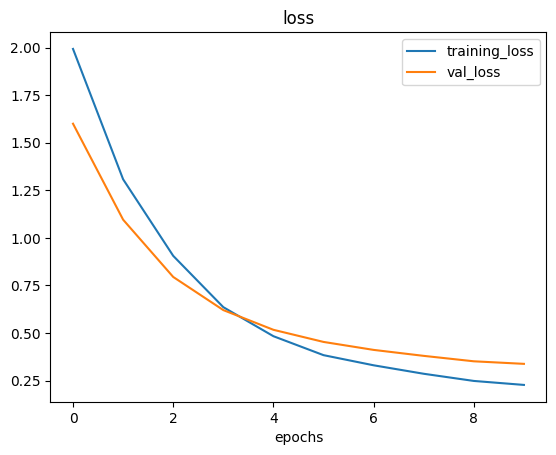

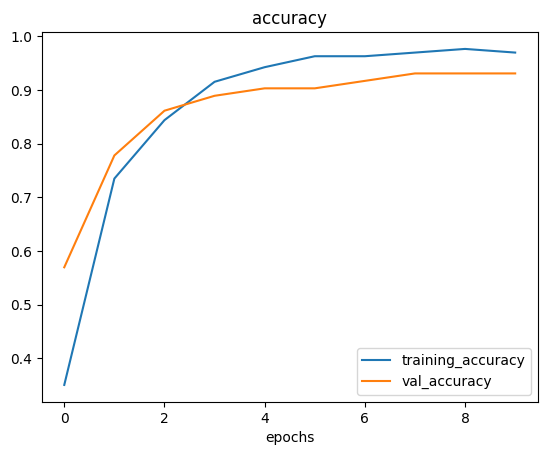

In [ ]:
# Plot the loss curves
plot_loss_curves(history_5)

In [ ]:
# Evaluate our model
efficientnet_model.evaluate(test_data)

3/3 [==============================] - 2s 638ms/step - loss: 0.3379 - accuracy: 0.9306


[0.3379175364971161, 0.9305555820465088]

In [ ]:
# Save our model
saved_model = efficientnet_model.save('/content/drive/MyDrive/Fruits')

In [ ]:
import tensorflow as tf
# Loading our saved model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Fruits')

In [ ]:
loaded_model.evaluate(test_data)

3/3 [==============================] - 11s 324ms/step - loss: 0.3379 - accuracy: 0.9306


[0.3379175364971161, 0.9305555820465088]

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_pred_image(filename,img_shape=224):
  #Read in the image
  img=tf.io.read_file(filename)

  #Decode the read file into a tensor
  img = tf.image.decode_image(img)

  #Resize the image
  img=tf.image.resize(img, size=[img_shape,img_shape])

  #Rescale the image
  img = img/255
  return img

In [ ]:
apple=load_and_pred_image("istockphoto-578292822-612x612.jpg")

In [ ]:
def pred_and_plot(model, filename,class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the
  image with the predicted class as the title"""

  #Import the target image and preprocess it
  img=load_and_pred_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #Get the predicted class
  pred_class=class_names[pred.argmax()]

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'prediction: {pred_class}')
  plt.axis(False)

In [ ]:
pred=loaded_model.predict(tf.expand_dims(apple,axis=0))
pred

1/1 [==============================] - 0s 24ms/step


array([[9.6125412e-01, 2.3955749e-03, 6.5499530e-03, 1.7570464e-03,
        8.5552724e-04, 3.5465704e-03, 1.3093018e-02, 6.1981576e-03,
        4.3499451e-03]], dtype=float32)

In [ ]:
pred1=tf.round(pred)
pred1

<tf.Tensor: shape=(1, 9), dtype=float32, numpy=array([[1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

1/1 [==============================] - 0s 57ms/step


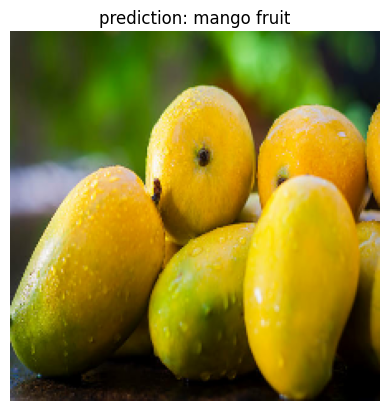

In [ ]:
pred_and_plot(loaded_model,'/content/istockphoto-534608466-612x612 (1).jpg')